# A2 Predicting Car Price

In this assignment, We need to predict the **selling price for a car** . Finally we also need to prepare a simple web-based car selling price prediction system for deployment.

## The provide raw data contains following features- 

- **name** : Brand name of the Car
- **Year** : Year of the car made
- **selling_price**: Selling price of the car
- **km_driven**: How many Killometers A car already run
- **fuel**: Type of fuel is used in car
- **seller_type**: Type of seller (Invididual, Dealer etc)
- **transmission**: Type of transmission of car ( Manual, Automatic)
- **owner**: How many owner already did purchase of a car
- **mileage**: Mileage of the car
- **engine**: Engine size
- **max_power**: The max power is available to a car
- **torque**:if an engine has a lot of torque, the car can accelerate more quickly.
- **seats**: Number of seats are availabe to a car

This raw dataset is required to be processed on given preporessing conditions


## Importing libraries

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.3')

## 1. Load data

In [4]:
# Read the CSV file 'Cars - Cars.csv' and store it in a data frame called 'df'
df = pd.read_csv('data/Cars.csv')

In [5]:
# Display the first few rows of the DataFrame 'df' to get a quick overview of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# Get the dimensions of the DataFrame 'df' using the shape attribute
df.shape

(8128, 13)

In [7]:
# Generate descriptive statistics of the DataFrame 'df' using the describe() function
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
# Display information about the DataFrame 'df', including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
# Get the unique values in the 'owner' column of the DataFrame 'df'
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [10]:
# Create a mapping of unique owner categories to numerical values
category_mapping_owener = {category: index + 1 for index, category in enumerate(df['owner'].unique())}
# Apply the mapping to the 'owner' column and update it with encoded values
df['owner'] = df['owner'].map(category_mapping_owener)
print(category_mapping_owener)
df.head()

{'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
#lambda function in somewhere later we need to check the owner category original value
get_key_by_value = lambda value: next((key for key, val in category_mapping_owener.items() if val == value), None)

In [12]:
# Get the unique values in the 'fuel' column of the DataFrame 'df'
df['fuel'].unique(), df.shape

(array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object), (8128, 13))

In [13]:
# Drop rows where 'fuel' column contains 'CNG' or 'LPG'
df = df.drop(df[df['fuel'].isin(['CNG', 'LPG'])].index)


In [14]:
# Check the unique values of the 'fuel' columns, and number of rows after dropping row with CNG and LGP
df['fuel'].unique(), df.shape

(array(['Diesel', 'Petrol'], dtype=object), (8033, 13))

In [15]:
# Display the first few rows of the 'mileage' column in the DataFrame 'df'
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [16]:
#For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float)
#Hint: usedf.mileage.str.split
# Split the 'Mileage' string and convert the numeric part to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)
# Display the first few rows of the 'mileage' column in the DataFrame 'df' after modification
df['mileage'].head()

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [17]:
# Display the first few rows of the 'engine' column in the DataFrame 'df'
df['engine'].head()

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [18]:
#For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
df['engine'] = df['engine'].str.split().str[0].astype(float)

In [19]:
# Display the first few rows of the 'engine' column in the DataFrame 'df' after modification
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [20]:
# Display the first few rows of the 'max_power' column in the DataFrame 'df' 
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [21]:
#For the feature max_power, remove Text part and convert the column to numerical type (e.g., float)
df['max_power'] = df['max_power'].str.split().str[0].astype(float)

In [22]:
# Display the first few rows of the 'max_power' column in the DataFrame 'df' after modification
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [23]:
# Rename the 'name' column to 'brand'
df = df.rename(columns={'name':'brand'})

# Extract the first word from the 'brand' column for each row
df['brand'] = df['brand'].str.split().str[0]
# The 'brand' column now contains only the first word of each brand name

In [24]:
#Drop the feature torque,
df.drop('torque', axis=1,inplace=True)

In [25]:
# Display the first 12 rows of the DataFrame 'df'
df.head(12)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,5.0


In [26]:
# Display the column names of the DataFrame 'df'
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [27]:
# Get the unique values in the 'owner' column of the DataFrame 'df'
df['owner'].unique()

array([1, 2, 3, 4, 5])

In [28]:
# Drop rows where the 'owner' column contains the value 5 (Test Drive Car)
df = df.drop(df[df['owner'].isin([5])].index)

__Now Our data looks like that it satisies all the given requirements__

In [29]:
# Display the first few rows of the DataFrame 'df' after dropping rows
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [30]:
# Apply log transform to the 'selling_price' column
df['selling_price'] = np.log(df['selling_price']) 

In [31]:
# Display the first few rows of the DataFrame 'df'
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [63]:
#copy the df.copy to further data processing & feature transformation
df_cp = df.copy()

In [64]:
# Display the first few rows of the DataFrame 'df_cp'
df_cp.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [65]:
df_cp['brand'].nunique()

32

In [67]:
df_cp = df.copy()
# Define the bin edges for your 4 classes (0-1, 1-2, 2-3, 3 and above)
bin_edges = [0, 1, 2, 3, float('inf')]  # Use float('inf') to represent "3 and above"

# Use pd.cut to categorize the 'selling_price' column into the 4 classes with numerical labels
df_cp['selling_price'] = pd.cut(df_cp['selling_price'], bins=bin_edges, labels=['0', '1', '2', '3'], include_lowest=True)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,3,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,3,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,3,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,3,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,3,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,3,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,3,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,3,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,3,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [68]:
df_cp.selling_price.unique()

['3']
Categories (4, object): ['0' < '1' < '2' < '3']

## 2. EDA 

### EDA is an essential step to inspect the data, so to better understand nature of the given data.

In [69]:
# Display information about the copied DataFrame 'df_cp', including data types and memory usage
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   brand          8028 non-null   object  
 1   year           8028 non-null   int64   
 2   selling_price  8028 non-null   category
 3   km_driven      8028 non-null   int64   
 4   fuel           8028 non-null   object  
 5   seller_type    8028 non-null   object  
 6   transmission   8028 non-null   object  
 7   owner          8028 non-null   int64   
 8   mileage        7814 non-null   float64 
 9   engine         7814 non-null   float64 
 10  max_power      7820 non-null   float64 
 11  seats          7814 non-null   float64 
dtypes: category(1), float64(4), int64(3), object(4)
memory usage: 760.7+ KB


### 2.1. Univariate analyis

Single variable exploratory data anlaysis

#### Categorical Variables Univariate Analysis

A **count plot** is a type of bar plot that is specifically used to visualize the frequency distribution of categorical data. It's particularly useful when we want to understand the distribution of categories within a single categorical variable. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Fiat'),
  Text(11, 0, 'Datsun'),
  Text(12, 0, 'Jeep'),
  Text(13, 0, 'Mercedes-Benz'),
  Text(14, 0, 'Mitsubishi'),
  Text(15, 0, 'Audi'),
  Text(16, 0, 'Volkswagen'),
  Text(17, 0, 'BMW'),
  Text(18, 0, 'Nissan'),
  Text(19, 0, 'Lexus'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'MG'),
  Text(23, 0, 'Volvo'),
  Text(24, 0, 'Daewoo'),
  Text(25, 0, 'Kia'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel'),
  Text(31, 0, 'Peugeot')])

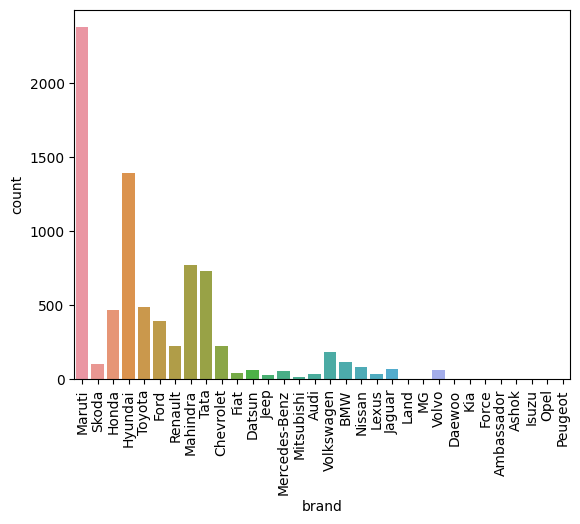

In [70]:
# Create a countplot to visualize the distribution of 'brand' column
sns.countplot(data = df, x ='brand')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

Since Car Name contains 32 unique categories, and this number of categories is very high compared to the number of dataset samples, it is better to drop it.

In [71]:
df_cp.drop('brand', axis=1,inplace=True)

We're using the matplotlib and seaborn libraries to create subplots with countplots for other categorical column in the DataFrame df_cp. The loop iterates through the categorical columns, and for each column, a countplot is created. 

In [72]:
# List of categorical columns in the DataFrame other than 'brand'
categorical_cols = ['fuel','seller_type', 'transmission']

Text(0.5, 0.98, 'Frequency')

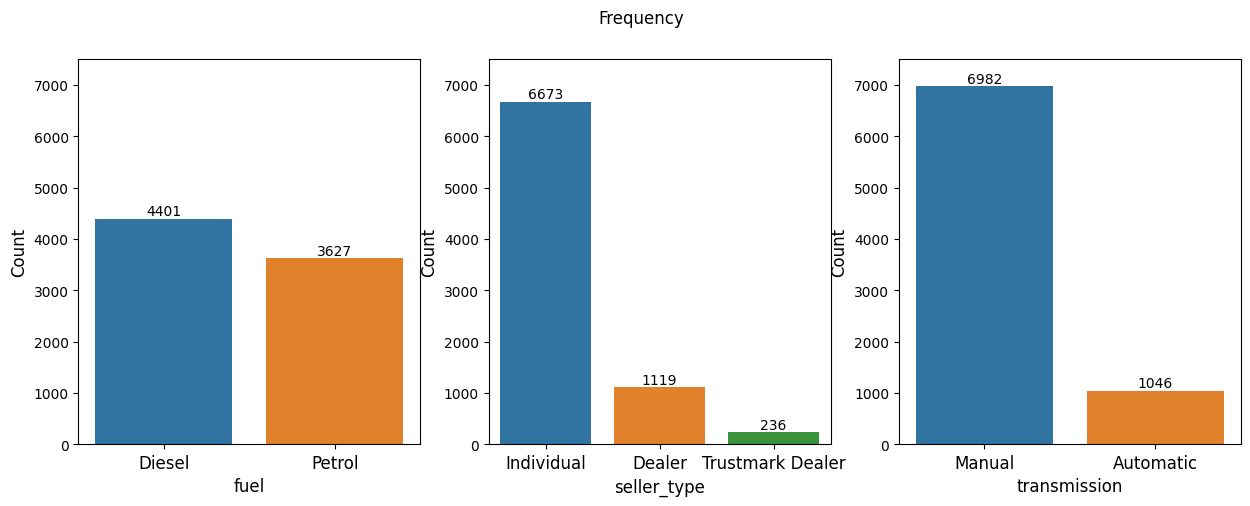

In [73]:
# Create a subplot layout with 1 row and 3 columns, set the figure size and dpi
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), dpi=100)
# Loop through the categorical columns for visualization
for i in range(len(categorical_cols)):
    #using countplot for visualizing the distribution of categorical data
    graph = sns.countplot(x= categorical_cols[i], data=df_cp, ax=ax[i])
    
    # Set labels and formatting for the subplot
    ax[i].set_xlabel(categorical_cols[i], fontsize=12)
    ax[i].set_ylabel('Count', fontsize=12)
    ax[i].set_ylim([0,7500])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), fontsize=12)
    # Add labels to the bars
    for cont in graph.containers:
        graph.bar_label(cont)
# Set a title for the overall visualization
plt.suptitle('Frequency')

- There are 2 fuel categories. Diesel has the highest frequency and Petrol has the least frequency.
- There are 3 seller_type categories. Individual has the highest frequency and Trustmark has the least frequency.
- There are 2 transmission categories. Manual has the highest frequency and Automatic has the least frequency.

### 2.2. Numerical Data Univariate Analysis

__Lineplot is commonly used to show trends, patterns, and changes in data over time or across a continuous variable.__

"Year" shows the car model year. We can replace this column with the cars age attribute.To calculate the age, we consider the origin time to be 1 year older than the maximum model year.

In [76]:
# Calculate and insert a new column 'age' based on the 'year' column
df_cp.insert(0, "age", df_cp["year"].max()+1-df_cp["year"])
# Drop the 'year' column from the DataFrame
df_cp.drop('year', axis=1, inplace=True)

In [77]:
# Define the numerical columns to visualize other than 'year'
numerical_cols = ['age', 'km_driven', 'owner','mileage','engine', 'seats','max_power', 'selling_price']

#### Distribution plot

__sns.displot is a function in Seaborn used to create distribution plots, particularly for univariate data. It's primarily used to visualize the distribution of a single variable and provides various options for displaying data like histograms, kernel density estimates, and more. displot is versatile and can be useful in a range of scenarios__

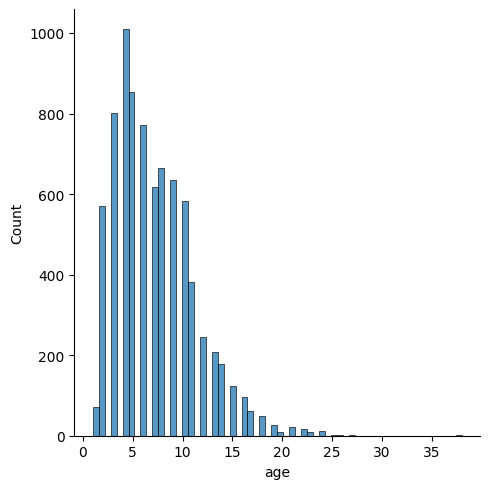

In [78]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'age'
sns.displot(data = df_cp, x = numerical_cols[0])

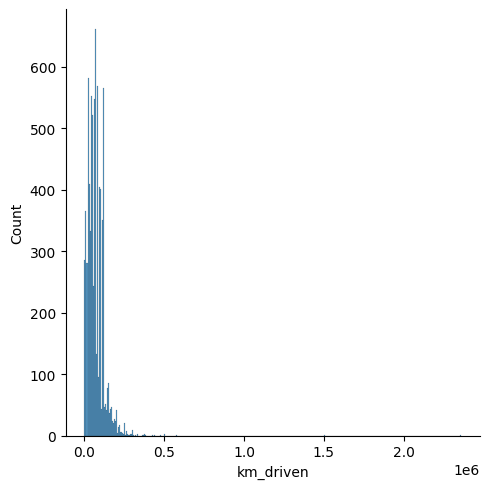

In [79]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'km_driven'
sns.displot(data = df_cp, x = numerical_cols[1])

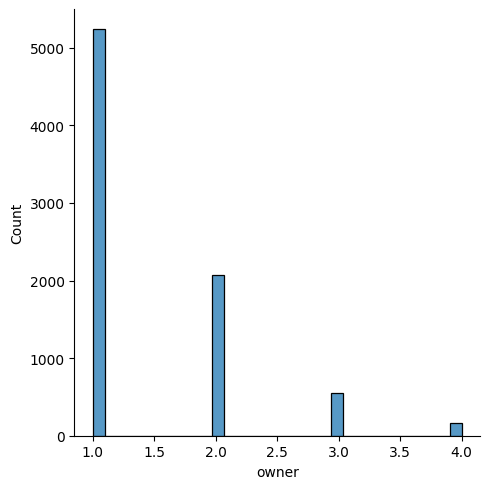

In [81]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'owner'
sns.displot(data = df_cp, x = numerical_cols[2])

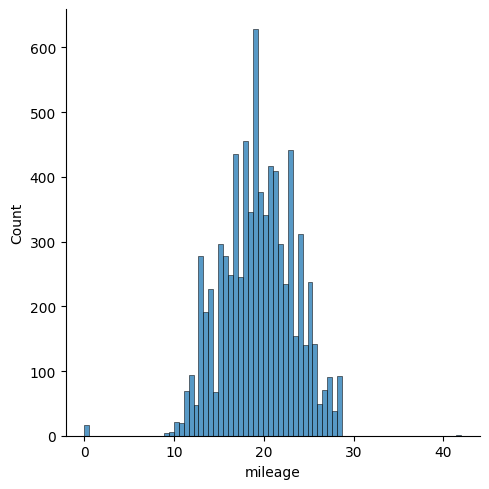

In [82]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'mileage'
sns.displot(data = df_cp, x = numerical_cols[3])

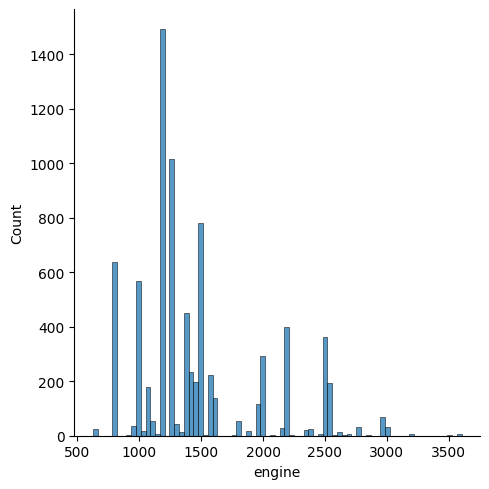

In [83]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'engine'
sns.displot(data = df_cp, x = numerical_cols[4])

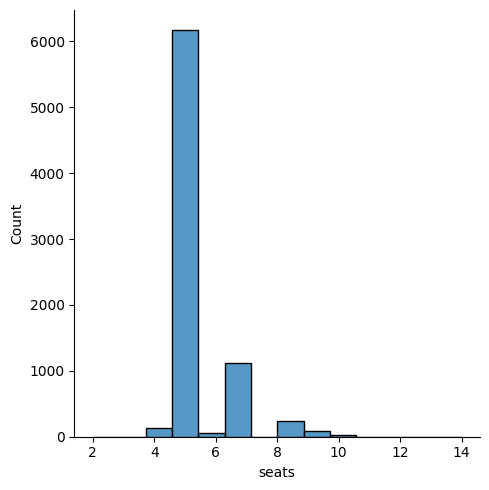

In [84]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'seats'
sns.displot(data = df_cp, x = numerical_cols[5])

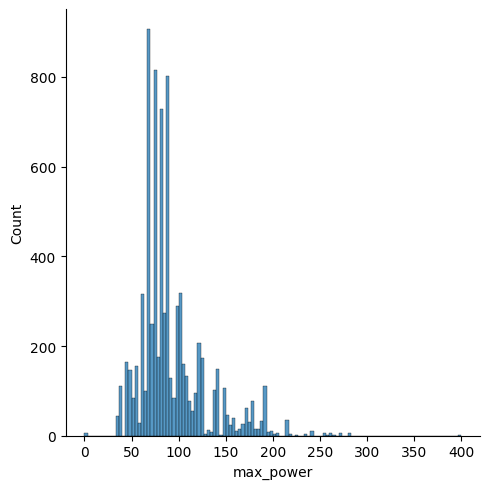

In [85]:
## Create a histogram using displot to visualize the distribution of the specified numerical column 'max_power'
sns.displot(data = df_cp, x = numerical_cols[6])

 Histograms and bin edges are used in data visualization to represent the distribution of numerical data.
- A histogram is a graphical representation of the distribution of a dataset. It groups the data into "bins" or intervals and displays the frequency or count of data points that fall within each bin. 
- Bin edges are the boundaries that define the intervals for grouping data in a histogram.




### 2.3. Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

Box plots are great for comparing the distribution of a numeric variable across different categories 

- They display the median, quartiles, and possible outliers in a clear and compact manner.
- The x parameter specifies the categorical variable
- The y parameter specifies the numerical variable 

#### Scatterplot

__The scatter plot visualizes how the two numerical variable are varied with each other while color-coding the points based on the different categories__

<Axes: xlabel='age', ylabel='selling_price'>

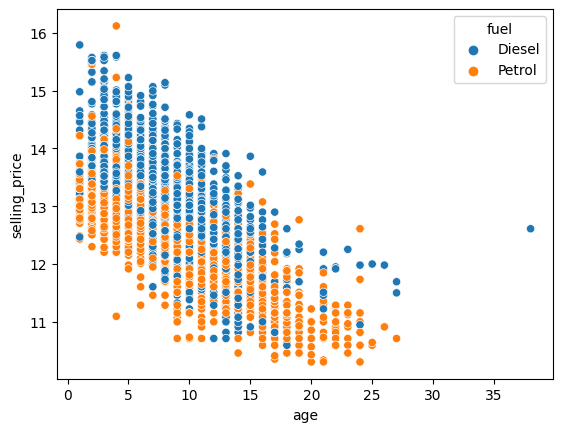

In [90]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'age' , 
#while color-coding the points based on the different 'fuel' categories
sns.scatterplot(x = df_cp[numerical_cols[0]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[0]])


<Axes: xlabel='age', ylabel='selling_price'>

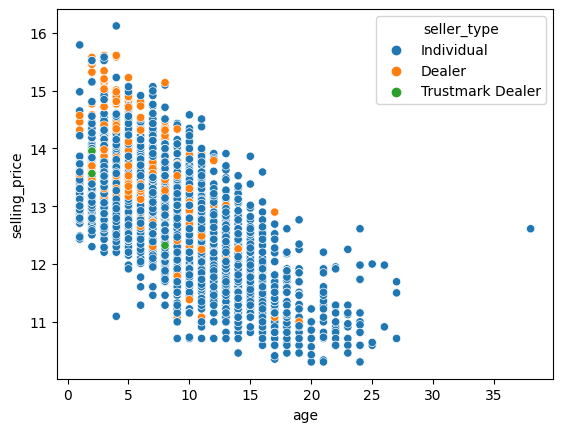

In [91]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'age', 
#while color-coding the points based on the different 'seller_type' categories
sns.scatterplot(x = df_cp[numerical_cols[0]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[1]])

<Axes: xlabel='age', ylabel='selling_price'>

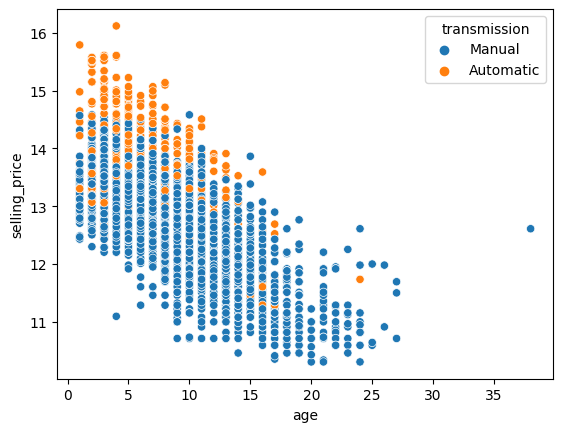

In [92]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'age', 
#while color-coding the points based on the different 'transmission' categories
sns.scatterplot(x = df_cp[numerical_cols[0]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[2]])

<Axes: xlabel='owner', ylabel='selling_price'>

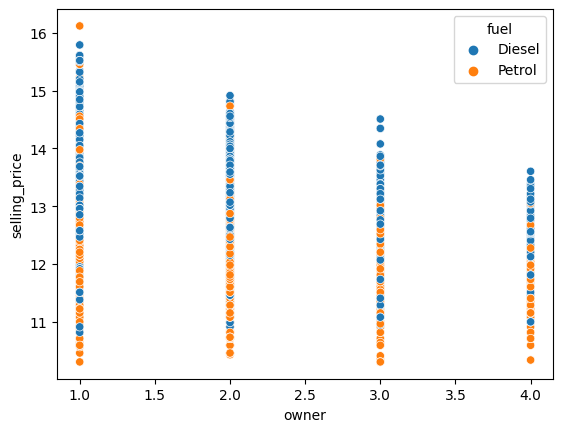

In [93]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'owner', 
#while color-coding the points based on the different 'fuel' categories
sns.scatterplot(x = df_cp[numerical_cols[2]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[0]])

<Axes: xlabel='owner', ylabel='selling_price'>

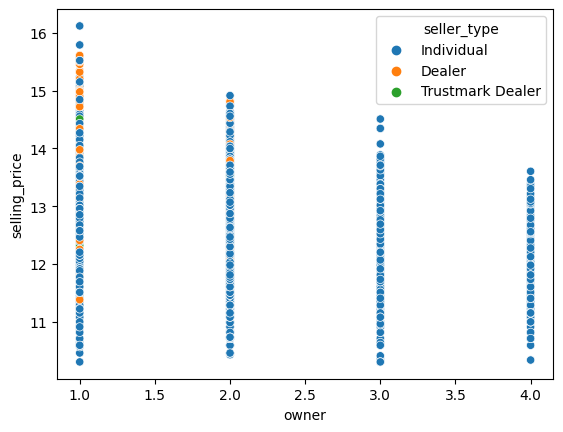

In [94]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'owner', 
#while color-coding the points based on the different 'seller_type' categories
sns.scatterplot(x = df_cp[numerical_cols[2]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[1]])

<Axes: xlabel='owner', ylabel='selling_price'>

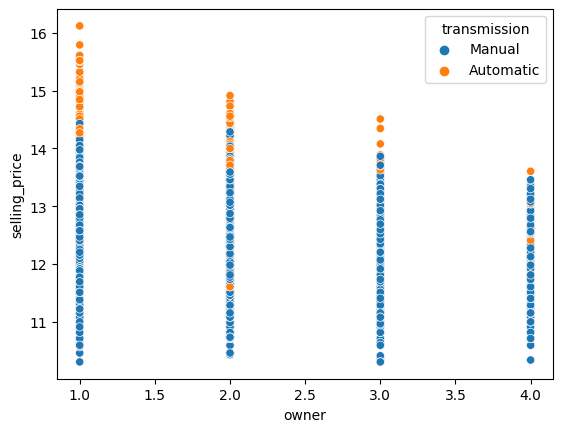

In [95]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'owner', 
#while color-coding the points based on the different 'transmission' categories
sns.scatterplot(x = df_cp[numerical_cols[2]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[2]])

<Axes: xlabel='km_driven', ylabel='selling_price'>

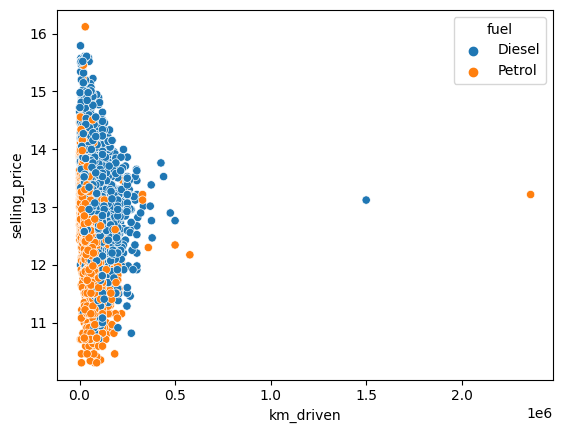

In [96]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'km_driven', 
#while color-coding the points based on the different 'fuel' categories
sns.scatterplot(x = df_cp[numerical_cols[1]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[0]])

<Axes: xlabel='km_driven', ylabel='selling_price'>

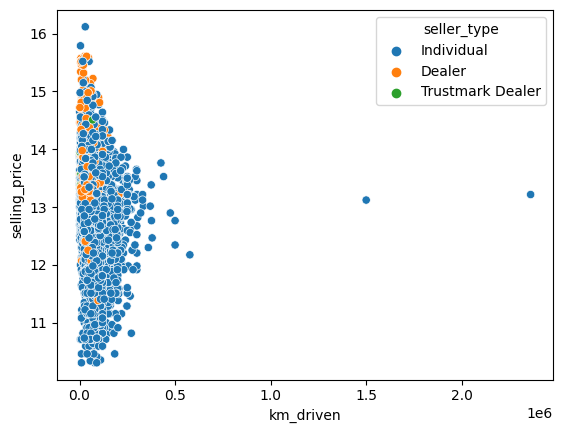

In [97]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'km_driven', 
#while color-coding the points based on the different 'seller_type' categories
sns.scatterplot(x = df_cp[numerical_cols[1]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[1]])

<Axes: xlabel='km_driven', ylabel='selling_price'>

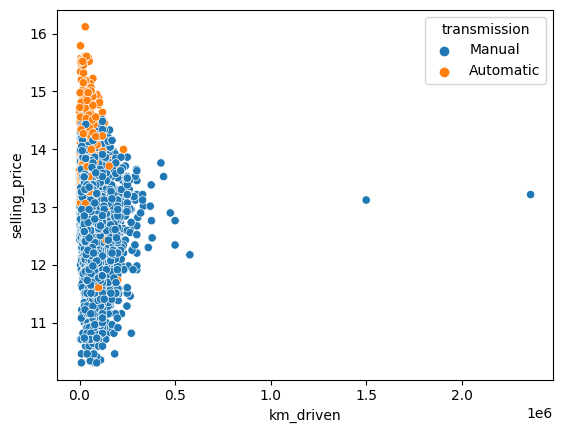

In [98]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'km_driven', 
#while color-coding the points based on the different 'transmission' categories
sns.scatterplot(x = df_cp[numerical_cols[1]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[2]])

<Axes: xlabel='mileage', ylabel='selling_price'>

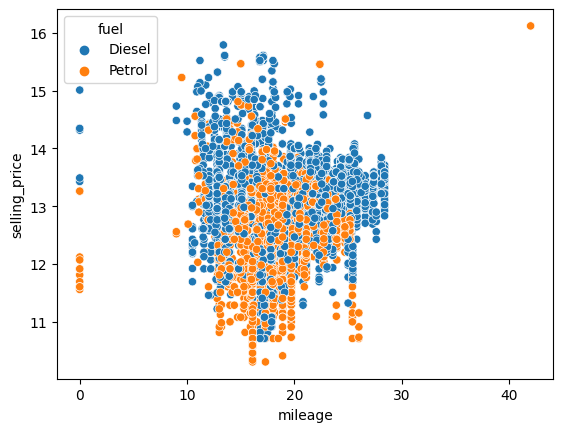

In [99]:
#The scatter plot visualizes how the 'selling_price' of cars varies with their 'mileage', 
#while color-coding the points based on the different 'fuel' categories
sns.scatterplot( x = df_cp[numerical_cols[3]], y = df[numerical_cols[-1]], hue=df_cp[categorical_cols[0]])

__To visualize all the possible pairs of numerical variable's relation with respect to each categorical variable, lets use matplotlib subploting, it will be time saving and help to concentrate more on data.__

In [100]:
#Function to call for all the numerical feature to show the relation by subploting with scatterplot
#for details https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
def do_scatterplot(numerical_feature, target, hue_label, nrows = 3, ncols = 3):
    # Create subplots layout with the specified number of rows and columns
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,12), dpi=200)

    # Loop through numerical features and create scatterplots with the target variable
    for i in range(len(numerical_feature)):
        x=i//3
        y=i%3
        # Create scatterplot using Seaborn's scatterplot function
        sns.scatterplot(data=df_cp, x=numerical_feature[i], y=target, hue=hue_label, ax=ax[x,y])

        # Set title, x-axis label, y-axis label, and grid for the subplot
        ax[x,y].set_title('{} vs. {}'.format(target, numerical_feature[i]), size = 15)
        ax[x,y].set_xlabel(numerical_feature[i], size = 12)
        ax[x,y].set_ylabel(target, size = 12)
        ax[x,y].grid()

    # Hide the subplots in the last row
    ax[2, 1].axis('off')
    ax[2, 2].axis('off')
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

#### Key finding of EDA

#####  selling_price vs numerical feature analysis
- As the car ages, its selling_price decreases. So selling_price is inversely proportional to the age of the car.

- As the car's Km_driven increases, its selling_price decreases. So selling_price is inversely proportional to Km_driven.

- As the number of previous car owners increases, its selling_price decreases. So Selling_Price is inversely proportional to Owner.

- As the number of  car size increases, its selling_price also increases. So Selling_Price is proportional to engine size.

- As the number of  max_power increases, its selling_price also increases. So Selling_Price is proportional to max_power.

##### selling_price vs categorical feature analysis 
- Diesel Cars > Petrol Cars in terms of selling_price.
- The selling_price of cars sold by individuals is lower than the price of cars sold by dealers.
- Automatic cars are more expensive than manual cars.


#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the selling_price.
It's also for checking whether certain features are too correlated.


Let's Check the correlation before the encoding of the categorical variables

In [102]:
df_cp.corr()

,age,km_driven,owner,mileage,engine,max_power,seats
age,1.000000,0.417761,0.513135,-0.328817,-0.016725,-0.226345,0.007718
km_driven,0.417761,1.000000,0.290474,-0.173733,0.209019,-0.036235,0.228646
owner,0.513135,0.290474,1.000000,-0.174818,0.007559,-0.110228,0.030173
mileage,-0.328817,-0.173733,-0.174818,1.000000,-0.578707,-0.372881,-0.454411
engine,-0.016725,0.209019,0.007559,-0.578707,1.000000,0.701834,0.610481
max_power,-0.226345,-0.036235,-0.110228,-0.372881,0.701834,1.000000,0.189248
seats,0.007718,0.228646,0.030173,-0.454411,0.610481,0.189248,1.000000


<Axes: >

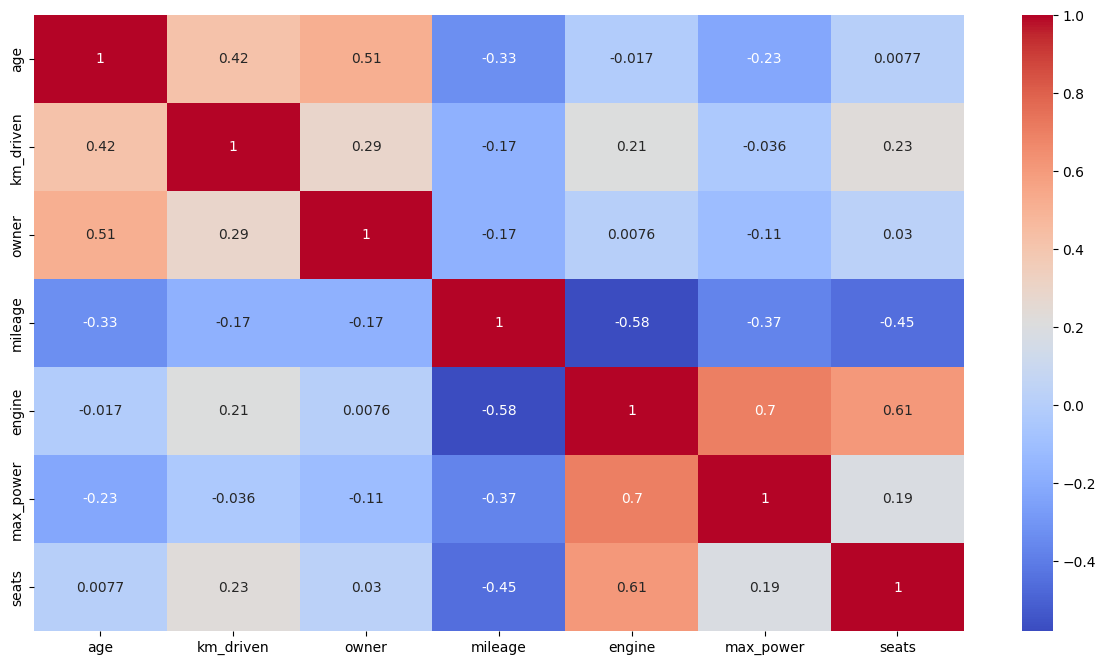

In [103]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df_cp.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

### Negative Correlations:
- 'age': There is a slight higher than moderate negative correlation between the age of the car and its selling price. As the car gets older, its selling price tends to decrease.
- 'km_driven': There is a weak negative correlation between the distance driven (km) and the selling price. Generally, cars with higher km_driven tend to have lower selling prices.
- 'owner': There is a moderate negative correlation between the number of previous owners and the selling price. Cars with more owners tend to have lower selling prices.
- 'mileage': There is a weak negative correlation between mileage and selling price. Cars with higher mileage tend to have slightly lower selling prices.
### Positive Correlations:
- 'engine': There is a moderate positive correlation between the engine's displacement and the selling price. Cars with larger engines tend to have higher selling prices.
- 'max_power': There is a strong positive correlation between the maximum power of the car and its selling price. More powerful cars tend to have higher selling prices.
- 'seats': There is a weak positive correlation between the number of seats and the selling price. Cars with more seats might have slightly higher selling prices.

__Lets see the individual correlation using regplot. Usually regplot function is used to create a scatter plot with a regression line, which helps in visualizing the relationship between two continuous variables.__

#### Label encoding

Now we would like to change categorical variables to number, since machine learning algorithms do not understand text.   Also, correlation matrix and other similar computational tools require label encoding.

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            8028 non-null   int64   
 1   selling_price  8028 non-null   category
 2   km_driven      8028 non-null   int64   
 3   fuel           8028 non-null   object  
 4   seller_type    8028 non-null   object  
 5   transmission   8028 non-null   object  
 6   owner          8028 non-null   int64   
 7   mileage        7814 non-null   float64 
 8   engine         7814 non-null   float64 
 9   max_power      7820 non-null   float64 
 10  seats          7814 non-null   float64 
dtypes: category(1), float64(4), int64(3), object(3)
memory usage: 956.0+ KB


#### Categorical Variables Encoding
__Dummy encoding, also known as one-hot encoding, is used to convert categorical variables into a format that can be used in machine learning algorithms. It is often used when dealing with categorical data that cannot be directly used in mathematical models like linear regression or neural networks__
- We implement dummy encoding on categorical columns, since they are all nominal variables:

In [107]:
# List of categorical columns to be one-hot encoded
cat_cols = ['fuel', 'seller_type', 'transmission']
# Use pandas get_dummies to perform one-hot encoding on the specified categorical columns
# Drop_first=True is used to prevent multicollinearity by dropping the first category
df_cp = pd.get_dummies(df_cp, columns=cat_cols, drop_first=True)
# Display the first 5 rows of the modified DataFrame
df_cp.head(5)

,age,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,7,3,145500,1,23.40,1248.0,74.00,5.0,0,1,0,1
1,7,3,120000,2,21.14,1498.0,103.52,5.0,0,1,0,1
2,15,3,140000,3,17.70,1497.0,78.00,5.0,1,1,0,1
3,11,3,127000,1,23.00,1396.0,90.00,5.0,0,1,0,1
4,14,3,120000,1,16.10,1298.0,88.20,5.0,1,1,0,1


In [108]:
#Check again the correlation
df_cp.corr()

,age,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
age,1.000000,0.417761,0.513135,-0.328817,-0.016725,-0.226345,0.007718,0.049176,0.246700,-0.102738,0.244663
km_driven,0.417761,1.000000,0.290474,-0.173733,0.209019,-0.036235,0.228646,-0.270750,0.204142,-0.084538,0.200960
owner,0.513135,0.290474,1.000000,-0.174818,0.007559,-0.110228,0.030173,-0.015134,0.223936,-0.077423,0.149047
mileage,-0.328817,-0.173733,-0.174818,1.000000,-0.578707,-0.372881,-0.454411,-0.069086,0.008412,-0.035549,0.177860
engine,-0.016725,0.209019,0.007559,-0.578707,1.000000,0.701834,0.610481,-0.503851,-0.128742,0.037387,-0.280823
max_power,-0.226345,-0.036235,-0.110228,-0.372881,0.701834,1.000000,0.189248,-0.298088,-0.280548,0.025456,-0.539233
seats,0.007718,0.228646,0.030173,-0.454411,0.610481,0.189248,1.000000,-0.352095,0.083137,-0.029106,0.074478
fuel_Petrol,0.049176,-0.270750,-0.015134,-0.069086,-0.503851,-0.298088,-0.352095,1.000000,-0.003889,0.141325,-0.029313
seller_type_Individual,0.246700,0.204142,0.223936,0.008412,-0.128742,-0.280548,0.083137,-0.003889,1.000000,-0.386209,0.372892
seller_type_Trustmark Dealer,-0.102738,-0.084538,-0.077423,-0.035549,0.037387,0.025456,-0.029106,0.141325,-0.386209,1.000000,-0.149513


<Axes: >

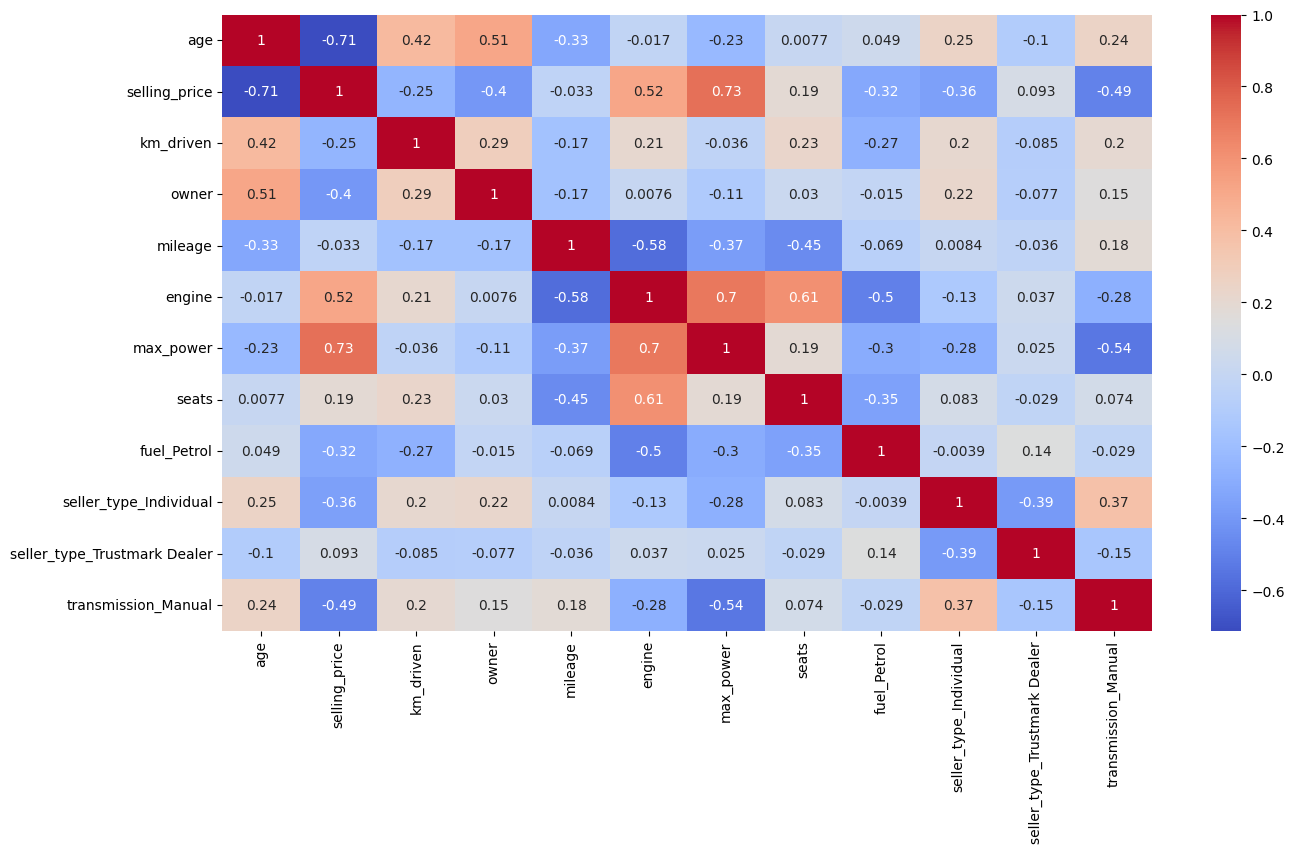

In [82]:
# Let's check out heatmap|
plt.figure(figsize = (15,8))
sns.heatmap(df_cp.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

- 'max_power': There is a strong positive correlation (0.729) between the maximum power of the car's engine and the selling price. More powerful cars tend to have higher selling prices.
- 'engine': There is a nearly strong  correlation (0.516) between the engine's displacement and the selling price. Cars with larger engines tend to have higher selling prices.
- 'age': There is a little higher than moderate negative correlation (-0.712) between the age of the car and its selling price. Newer cars generally have higher selling prices.
- 'transmission_Manual': There is a moderate negative correlation (-0.494) between manual transmission and selling price. Cars with manual transmissions tend to have lower selling prices.
- 'owner': There is a moderate negative correlation (-0.400) between the number of previous owners and the selling price. Cars with more owners tend to have lower selling prices.
- 'seats': There is a weak positive correlation (0.187) between the number of seats and the selling price. Cars with more seats might have slightly higher selling prices.
- 'km_driven', 'mileage', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer': These features show relatively weak correlations with selling price, suggesting that their impact on price is less pronounced.

In [83]:
#Check the description of target variable selling_price
df_cp.selling_price.describe()

count    8028.000000
mean       12.979337
std         0.838039
min        10.308919
25%        12.468437
50%        13.017003
75%        13.429848
max        16.118096
Name: selling_price, dtype: float64

In [84]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           8028 non-null   int64  
 1   selling_price                 8028 non-null   float64
 2   km_driven                     8028 non-null   int64  
 3   owner                         8028 non-null   int64  
 4   mileage                       7814 non-null   float64
 5   engine                        7814 non-null   float64
 6   max_power                     7820 non-null   float64
 7   seats                         7814 non-null   float64
 8   fuel_Petrol                   8028 non-null   uint8  
 9   seller_type_Individual        8028 non-null   uint8  
 10  seller_type_Trustmark Dealer  8028 non-null   uint8  
 11  transmission_Manual           8028 non-null   uint8  
dtypes: float64(5), int64(3), uint8(4)
memory usage: 853.9 KB


In [85]:
df_cp.shape

(8028, 12)

#### Predictive Power Score

This is another way to check the predictive power of some feature.  Unlike correlation, `pps` actually obtained from actual prediction.  For more details:
    
- The score is calculated using only 1 feature trying to predict the target column. This means there are no interaction effects between the scores of various features. Note that this is in contrast to feature importance
- The score is calculated on the test sets of a 4-fold crossvalidation (number is adjustable via `ppscore.CV_ITERATIONS`)
- All rows which have a missing value in the feature or the target column are dropped
- In case that the dataset has more than 5,000 rows the score is only calculated on a random subset of 5,000 rows with a fixed random seed (`ppscore.RANDOM_SEED`). You can adjust the number of rows or skip this sampling via the API. However, in most scenarios the results will be very similar.
- There is no grid search for optimal model parameters

We can install by doing <code>pip install ppscore</code>

In [109]:
import ppscore as pps
# Create a copy of the encoded DataFrame for calculating predictive power scores
dfcopy = df_cp.copy()
dfcopy.head(2)

,age,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,7,3,145500,1,23.40,1248.0,74.00,5.0,0,1,0,1
1,7,3,120000,2,21.14,1498.0,103.52,5.0,0,1,0,1


<Axes: xlabel='x', ylabel='y'>

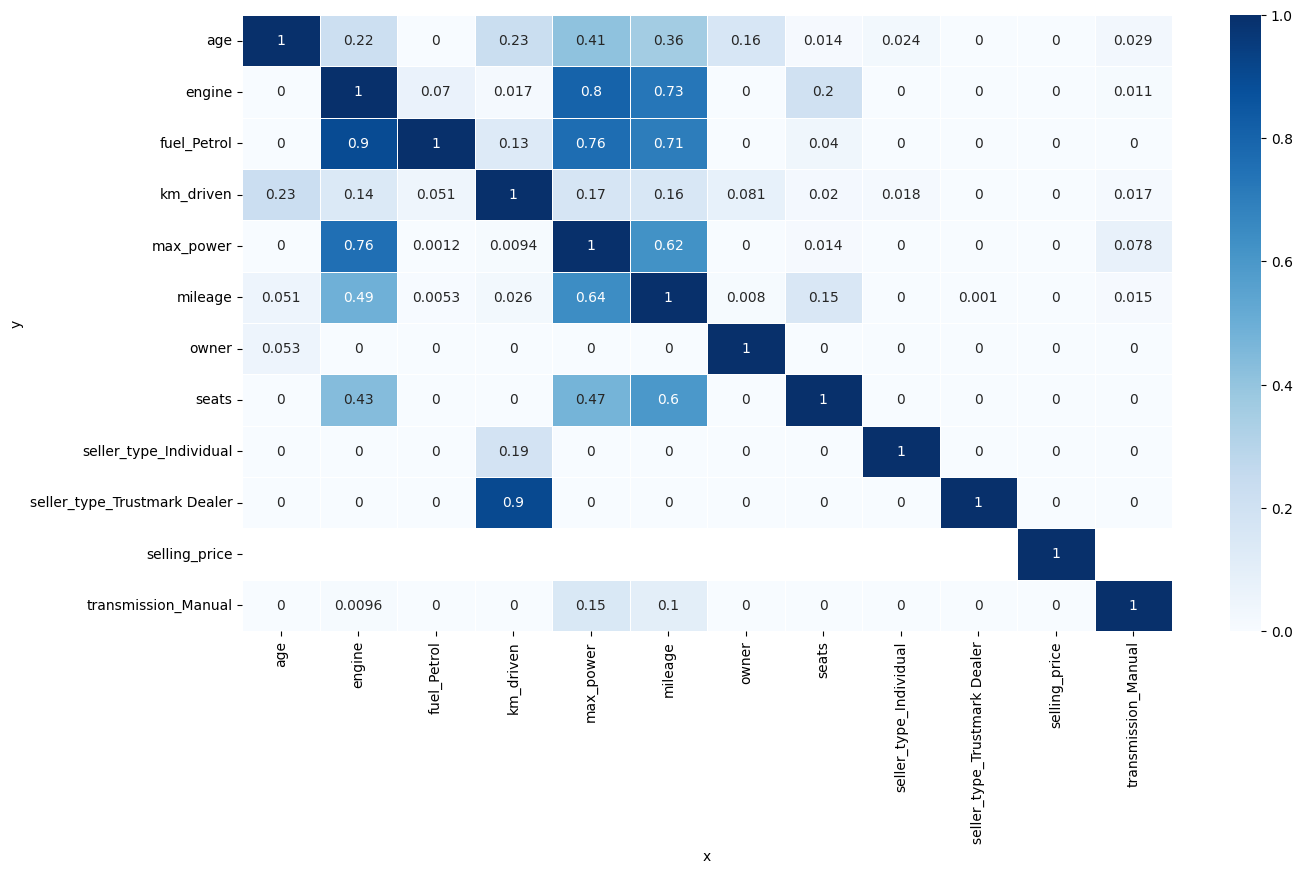

In [110]:
#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

- 'max_power': The feature 'max_power' has a relatively strong predictive power score (0.563) with the 'selling_price'. Higher values of maximum power are indicative of higher selling prices.
- 'engine': The feature 'engine' also has a relatively strong predictive power score (0.400) with the 'selling_price'. Larger engine sizes are associated with higher selling prices.
- 'age': The 'age' of the car has a moderate predictive power score (0.306) with the 'selling_price'. Newer cars tend to have higher selling prices.
- 'mileage': The 'mileage' feature has a moderate predictive power score (0.399) with the 'selling_price'. Cars with better mileage tend to have higher selling prices.
- 'owner', 'fuel_Petrol', 'km_driven', 'transmission_Manual', 'seats', 'seller_type_Individual', 'seller_type_Trustmark Dealer': These features have low predictive power scores, suggesting that their influence on the 'selling_price' might not be very strong or consistent.

## 3. Feature Engineering

In this Selling_price prediction we generated a feature called age by subtracting the year of car made from the max year of the dataset

## 4. Feature selection

In [112]:
#Print All the column Names
df_cp.columns

Index(['age', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine',
       'max_power', 'seats', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual'],
      dtype='object')

We chose the specific features 'km_driven', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual' for predicting the 'selling_price' for the following reasons -  

- 'km_driven':
     - The number of kilometers driven by a car can indicate its usage and potential wear and tear.
     - Cars with lower km_driven might be perceived as having more life left and could potentially command higher prices.
     - The feature can capture the relationship between usage and depreciation, impacting selling prices.
- 'age':
     - The age of a car is a direct indicator of its overall condition and longevity.
     - Newer cars generally tend to have higher selling prices compared to older ones.
     - Age is often a key factor in assessing the value of a used car and can strongly influence buyer perception.
     - I discussed with peoples and domain expert in Tokyo those who are engaged in used car selling business. According to them Age of Car is a crucial Fact for deciding the price.
- 'engine':
     - Engine size is a measure of the engine's size and power output.
     - Cars with larger engines might offer better performance, which could influence their selling prices.
     - Engine size can impact the overall driving experience and may attract buyers willing to pay more.
     - I discussed with peoples and domain expert in Tokyo those who are engaged in used car selling business. According to them size of enginer is a must factor to decide the price.
- 'fuel_Petrol':
     - Fuel type can affect operating costs, environmental impact, and buyer preferences.
     - Cars with different fuel types (such as petrol, diesel, or others) might have varying selling prices.
     - The choice of fuel type can influence the target audience and market demand for the car.
- 'transmission_Manual':
     - The type of transmission (manual or automatic) can influence driving experience and convenience.
     - Manual transmissions are often associated with lower initial costs and different driving preferences.
     - The choice of transmission can impact the buyer's willingness to pay, affecting selling prices.


In [117]:
df_cp.dtypes

age                                int64
selling_price                   category
km_driven                          int64
owner                              int64
mileage                          float64
engine                           float64
max_power                        float64
seats                            float64
fuel_Petrol                        uint8
seller_type_Individual             uint8
seller_type_Trustmark Dealer       uint8
transmission_Manual                uint8
dtype: object

In [124]:
# Define the list of selected features for prediction
feature_list  = ['km_driven','age','engine','fuel_Petrol','transmission_Manual']

In [125]:
# Create the feature matrix X by selecting the specified features
X = df_cp[feature_list]
# Create the target vector y using the 'selling_price' column
y = df_cp['selling_price']

In [126]:
df_cp.head(3)

,age,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,selling_price_encoded
0,7,3,145500,1,23.40,1248.0,74.00,5.0,0,1,0,1,0
1,7,3,120000,2,21.14,1498.0,103.52,5.0,0,1,0,1,0
2,15,3,140000,3,17.70,1497.0,78.00,5.0,1,1,0,1,0


### Train test split

__using the train_test_split function from the sklearn.model_selection module to split your dataset into training and testing sets.__

In [127]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
# Set test_size to 0.3 for a 70-30 train-test split
# Use random_state for reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [128]:
# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5619, 5), (2409, 5), (5619,), (2409,))

In [129]:
print("Total Dataset Size", X.shape[0])
print("Training Dataset Size", X_train.shape[0])
print("Test Dataset Size", X_test.shape[0])

Total Dataset Size 8028
Training Dataset Size 5619
Test Dataset Size 2409


In [130]:
# Perform an assertion to ensure that the number of samples in X_train matches y_train
assert X_train.shape[0] == y_train.shape[0]

## 5. Preprocessing

### Check Null values

In [131]:
# Check for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven                0
age                      0
engine                 154
fuel_Petrol              0
transmission_Manual      0
dtype: int64

In [132]:
# Check for null values in the selected features of the test set
X_test[ feature_list].isna().sum()

km_driven               0
age                     0
engine                 60
fuel_Petrol             0
transmission_Manual     0
dtype: int64

In [133]:
# Check for null values in the training target vector y_train
y_train.isna().sum()

0

In [134]:
# Check for null values in the training target vector y_test
y_test.isna().sum()

0

In [135]:
len(feature_list)

5

In [136]:
feature_list

['km_driven', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual']

__Among the 5 features only 'engine' contains null values__

In [137]:
# Impute the missing values in the 'engine' feature with the mean value for training set
X_train['engine'].fillna(X_train['engine'].mean(), inplace=True)
# Impute the missing values in the 'engine' feature with the mean value for testing set
X_test['engine'].fillna(X_test['engine'].mean(), inplace=True)

In [138]:
# Check again for null values in the selected features of the training set
X_train[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [139]:
# Check again for null values in the selected features of the test set
X_test[ feature_list ].isna().sum()

km_driven              0
age                    0
engine                 0
fuel_Petrol            0
transmission_Manual    0
dtype: int64

In [141]:
# Check for null values in the training target vector y_train & test target vector y_test
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking Outliers

{'km_driven': 1, 'age': 2, 'engine': 3, 'fuel_Petrol': 4, 'transmission_Manual': 5}


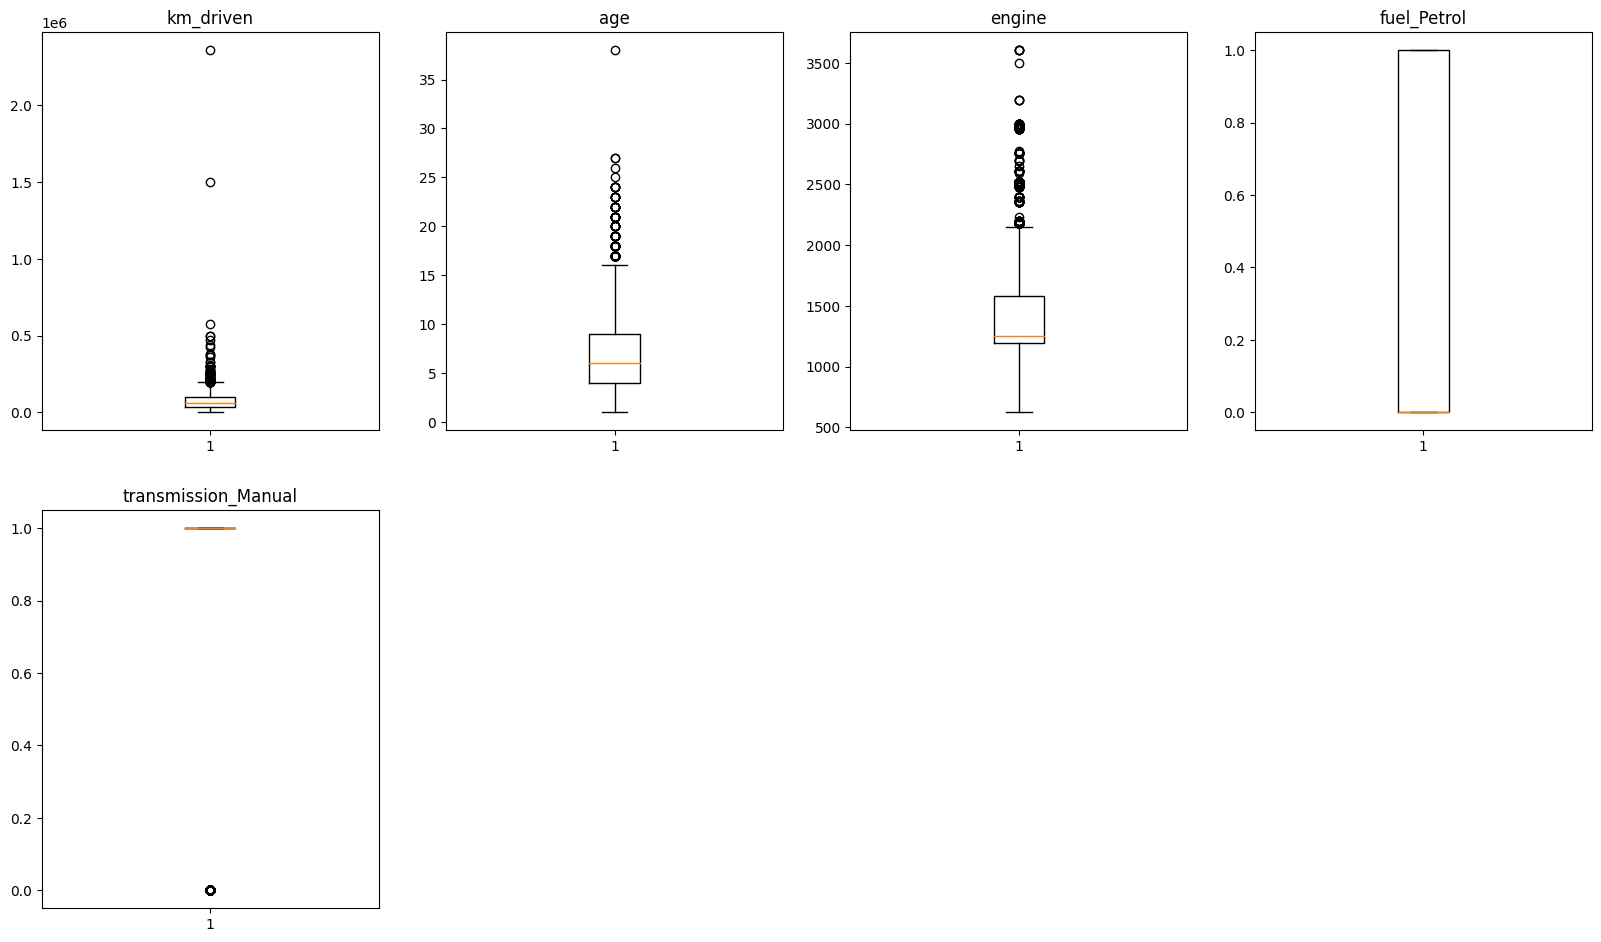

In [142]:
# Create a dictionary of columns.
col_dict = {feature: indx+1 for indx, feature in enumerate(feature_list)}
print(col_dict)

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [143]:
def outlier_count(col, data = X_train):
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    # calculate your inter quatile
    iqr = q75 - q25
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = np.where((data[col] > max_val) | (data[col] < min_val))  # np.where return tuple.

    outlier_count = outlier_count[0] #
    outlier_count = len(outlier_count)

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [144]:
# Iterate through columns of the training feature matrix
for col in X_train.columns:
    print(col)
    # Apply the function 'outlier_count' to the current column
    outlier_count(col)

km_driven

---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%
age

---------------age---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%
engine

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%
fuel_Petrol
transmission_Manual

---------------transmission_Manual---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%


 **Before Scalling we preserve mean of  the input feature (will be used later deployment where user won't input  value of a particular feature )**

In [145]:
max_year = df['year'].max()
mean_age = X_train['age'].mean()
mean_km_driven = X_train['km_driven'].mean()
mean_engine_size = X_train['engine'].mean()
max_year,mean_age, mean_km_driven, mean_engine_size

(2020, 7.137924897668625, 70029.87346502936, 1463.855626715462)

In [146]:
X_train.head()

,km_driven,age,engine,fuel_Petrol,transmission_Manual
6853,120000,6,2499.0,0,1
1495,90000,8,2523.0,0,1
7904,92000,8,1248.0,0,1
1281,100000,11,1248.0,0,1
1421,120000,11,1396.0,0,1


### Scaling

__Feature scaling helps improve reach convergence faster__
- using the StandardScaler from sklearn.preprocessing to standardize the numerical features in the training and testing sets.
- Categorical features are typically represented as binary or one-hot encoded vectors. These representations are already in a consistent format that doesn't have varying magnitudes like numerical features.

In [147]:
from sklearn.preprocessing import StandardScaler

# List of continuous numerical features to be standardized
feature_list_continuous = ['km_driven', 'age', 'engine']
# Initialize the StandardScaler
scaler = StandardScaler()
# Standardize the selected numerical features in the training set
X_train[feature_list_continuous] = scaler.fit_transform(X_train[feature_list_continuous])
# Standardize the selected numerical features in the testing set
X_test[feature_list_continuous]  = scaler.transform(X_test[feature_list_continuous])

- Save scaler for future inference 

In [152]:
import pickle5 as pickle

In [153]:
# Save the scaler's mean and scale parameters
scaler_path = "./model/scaler.pkl"
scaler_params = {
    'mean': scaler.mean_,
    'scale': scaler.scale_
}
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler_params, scaler_file)

In [154]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 5)
Shape of X_test:  (2409, 5)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [155]:
#copying train and test dataset 
X_train_set = X_train.copy()
X_test_set =  X_test.copy()

In [156]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train_set.shape, type(X_train))
print("Shape of X_test: ", X_test_set.shape, type(X_test))
print("Shape of y_train: ", y_train.shape, type(y_train))
print("Shape of y_test: ", y_test.shape, type(y_test))

Shape of X_train:  (5619, 5) <class 'pandas.core.frame.DataFrame'>
Shape of X_test:  (2409, 5) <class 'pandas.core.frame.DataFrame'>
Shape of y_train:  (5619,) <class 'pandas.core.series.Series'>
Shape of y_test:  (2409,) <class 'pandas.core.series.Series'>


In [157]:
#add intercept in both training and testing feature
X_train_set['intercept'] = 1
X_test_set['intercept'] = 1

In [158]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train_set.shape, type(X_train))
print("Shape of X_test: ", X_test_set.shape, type(X_test))
print("Shape of y_train: ", y_train.shape, type(y_train))
print("Shape of y_test: ", y_test.shape, type(y_test))

Shape of X_train:  (5619, 6) <class 'pandas.core.frame.DataFrame'>
Shape of X_test:  (2409, 6) <class 'pandas.core.frame.DataFrame'>
Shape of y_train:  (5619,) <class 'pandas.core.series.Series'>
Shape of y_test:  (2409,) <class 'pandas.core.series.Series'>


In [159]:
# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train_set.values
X_test_np = X_test_set.values

# Convert pandas Series to NumPy arrays
y_train_np = y_train.values
y_test_np = y_test.values

In [160]:
type(X_train_np)

numpy.ndarray

In [161]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train_np.shape, type(X_train_np))
print("Shape of X_test: ", X_test_np.shape,type(X_test_np))
print("Shape of y_train: ", y_train_np.shape,type(y_train_np))
print("Shape of y_test: ", y_test_np.shape,type(y_test_np))

Shape of X_train:  (5619, 6) <class 'numpy.ndarray'>
Shape of X_test:  (2409, 6) <class 'numpy.ndarray'>
Shape of y_train:  (5619,) <class 'pandas.core.arrays.categorical.Categorical'>
Shape of y_test:  (2409,) <class 'pandas.core.arrays.categorical.Categorical'>


In [162]:
#experiment tracking
import os
import mlflow
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th")
mlflow.set_experiment(experiment_name="st124047-a3")

<Experiment: artifact_location='mlflow-artifacts:/589799493908908443', creation_time=1695815973047, experiment_id='589799493908908443', last_update_time=1695815973047, lifecycle_stage='active', name='st124047-a3', tags={}>

### 6. Modeling

In [163]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def accuracy(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        # Calculate the number of correct predictions
        num_correct = np.sum(Y_true == Y_pred)
        
        # Calculate the accuracy
        accuracy = num_correct / Y_true.shape[0]
        
        return accuracy
    
    def precision_recall_f1(self, Y_true, Y_pred):
        # Ensure Y_true and Y_pred have the same shape
        if Y_true.shape != Y_pred.shape:
            raise ValueError("Input shapes of Y_true and Y_pred must be the same.")
        
        num_classes = self.k
        precision_scores = []
        recall_scores = []
        f1_scores = []

        for c in range(num_classes):
            # Calculate True Positives, False Positives, True Negatives, and False Negatives for class c
            TP_c = np.sum((Y_true == c) & (Y_pred == c))
            FP_c = np.sum((Y_true != c) & (Y_pred == c))
            TN_c = np.sum((Y_true != c) & (Y_pred != c))
            FN_c = np.sum((Y_true == c) & (Y_pred != c))

            # Calculate precision, recall, and F1-score for class c
            precision_c = TP_c / (TP_c + FP_c) if (TP_c + FP_c) > 0 else 0.0
            recall_c = TP_c / (TP_c + FN_c) if (TP_c + FN_c) > 0 else 0.0
            f1_c = 2 * precision_c * recall_c / (precision_c + recall_c) if (precision_c + recall_c) > 0 else 0.0

            precision_scores.append(precision_c)
            recall_scores.append(recall_c)
            f1_scores.append(f1_c)

        return precision_scores, recall_scores, f1_scores
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

## 7. Experiment

In [123]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [124]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train_np.shape, type(X_train_np))
print("Shape of X_test: ", X_test_np.shape,type(X_test_np))
print("Shape of y_train: ", y_train_np.shape,type(y_train_np))
print("Shape of y_test: ", y_test_np.shape,type(y_test_np))

Shape of X_train:  (5619, 6) <class 'numpy.ndarray'>
Shape of X_test:  (2409, 6) <class 'numpy.ndarray'>
Shape of y_train:  (5619,) <class 'numpy.ndarray'>
Shape of y_test:  (2409,) <class 'numpy.ndarray'>


In [131]:
from sklearn.preprocessing import PolynomialFeatures
regs = ["Polynomial", "Lasso", "Ridge",'Normal']
init_thetas = ['zero','xavier']
methods = ['batch', 'sto','mini']
momentums = [0, 0.9]
lr_li =  [0.01, 0.001, 0.0001]

for reg in regs:
    for init_theta in init_thetas:
        for method in methods:
            for momentum in momentums:
                for lr in lr_li:

                    params = {"method": method, "init_theta" : init_theta, "loss_func": "mse","momentum": momentum,"lr": lr, "l": 0.1}
                    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
                    
                    print("="*5, "Reg:",reg,"Method:",method, "Momentum:",momentum,"Theta Init:", init_theta, "Learning Rate:", lr , "="*5)

                    if reg == "Polynomial":
                        X_train_pol = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(X_train_np)
                        X_test_pol = PolynomialFeatures(degree = 2, include_bias=False).fit_transform(X_test_np)

                        type_of_regression = str_to_class("Normal")   
                        model = type_of_regression(**params)  
                        model.fit(X_train_pol, y_train_np)
                        yhat = model.predict(X_test_pol)
                        mse  = model.mse(yhat, y_test_np)
                        r2 = model.r2_score(yhat, y_test_np)
                        print("Test MSE: ", mse)
                        mlflow.log_metric(key="test_mse", value=mse)
                        print("Test r2: ", r2)
                        mlflow.log_metric(key="test_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train_pol, model.predict(X_test_pol))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                    else:

                        # #######
                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                        model = type_of_regression(**params)  
                        model.fit(X_train_np, y_train_np)
                        yhat = model.predict(X_test_np)
                        mse  = model.mse(yhat, y_test_np)
                        print("Test MSE: ", mse)
                        mlflow.log_metric(key="test_mse", value=mse)
                        r2 = model.r2_score(yhat, y_test_np)
                        print("Test R2",r2)
                        mlflow.log_metric(key='test_r2', value=r2)

                        signature = mlflow.models.infer_signature(X_train_np, model.predict(X_train_np))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                    # #######
                    mlflow.end_run()
                

===== Reg: Polynomial Method: batch Momentum: 0 Theta Init: zero Learning Rate: 0.01 =====
Fold 0: inf
Fold 1: inf
Fold 2: 2.3708202020161933
Test MSE:  1.4657978546492334
Test r2:  0.026971715515744288
===== Reg: Polynomial Method: batch Momentum: 0 Theta Init: zero Learning Rate: 0.001 =====
Fold 0: 10.350652842555547
Fold 1: 10.266768238917093
Fold 2: 10.842259470157384
Test MSE:  10.333504434537542
Test r2:  -0.3713514135643001
===== Reg: Polynomial Method: batch Momentum: 0 Theta Init: zero Learning Rate: 0.0001 =====
Fold 0: 87.45091303534744
Fold 1: 86.85162088986071
Fold 2: 93.27783781513736
Test MSE:  85.92243166857507
Test r2:  -37.92546603296297
===== Reg: Polynomial Method: batch Momentum: 0.9 Theta Init: zero Learning Rate: 0.01 =====
Fold 0: inf
Fold 1: inf
Fold 2: 10.860576704123778
Test MSE:  10.329991998563896
Test r2:  -0.3922205118613149
===== Reg: Polynomial Method: batch Momentum: 0.9 Theta Init: zero Learning Rate: 0.001 =====
Fold 0: 86.87387142467115
Fold 1: 86.

## 8. Model Selection & Inference
From MLFLOW logs checking, among 101 various runs. We check polynomial. Lasso and Normal Lineare regression. 

Among all of them, we come with the Normal Linear Regression model works better in our case with  below configuratrion- 
 - Method: stochastic 
 - Momentum: 0 
 - Theta Init: xavier 
 - Learning Rate: 0.001
 
 The choosen model's Accuracy- 
  - MSE 0.13870882535633300
  - R^2 0.7589047939394720

#### Some of the runs from MLFLOW and the comparison of various runs with their test mse and r^2 scores
![](snapshots/MLflow-runs.png)

![](snapshots/loss_img_1.png)

![](snapshots/loss_img_2.png)

![](snapshots/loss_img_3.png)

![](snapshots/loss_img_4.png)

## Make an inference from MLFLOW

In [174]:
#Checking the model from MLFLOW
import mlflow
logged_model = 'runs:/6f075d968e7042dbba5fe03d0c95dd71/model'
# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)
data = X_test_np[100].reshape(1,-1)

predPrice = loaded_model.predict(data)[0]
print(np.exp(y_test_np[101]), np.exp(predPrice))

3200000.000000002 403660.0966855171


After export of the model from MLFLOW, Lets have an inference on Test data
  - We calculate the mse and r^2 score on Test data
  - and Check the feature importance 

(2409, 6) [[-0.58207856  0.71572536 -0.1923894   1.          1.          1.        ]
 [ 0.66416893 -0.53463554  0.23712458  0.          1.          1.        ]
 [-0.16666273 -0.28456336 -0.93500701  1.          1.          1.        ]
 ...
 [-0.68177836  0.96579754 -0.58577603  1.          1.          1.        ]
 [-0.89447126 -0.78470772 -0.43323835  0.          1.          1.        ]
 [-0.99749439 -0.78470772 -1.30430875  1.          1.          1.        ]]
MSE Accuracy on Test data 0.13889986754620526
R^2 Accuracy on Test data 0.8025831921629607


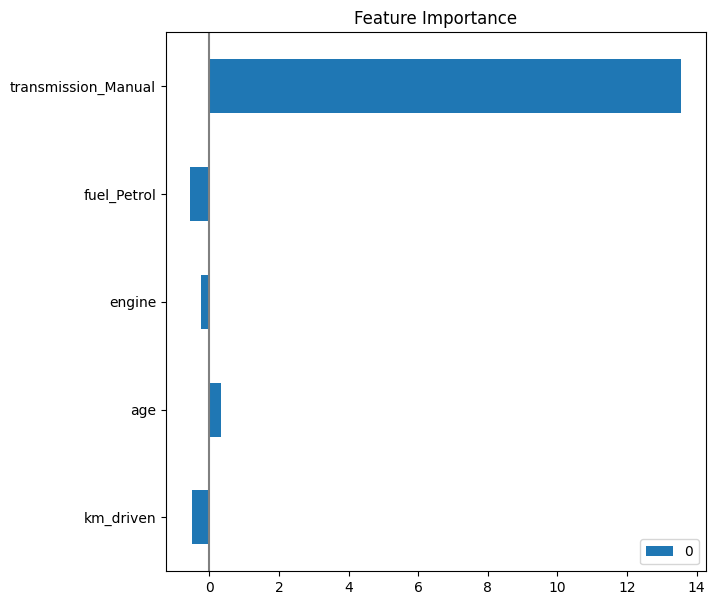

In [182]:

import pickle
logged_model = 'app/code/model/car_pred_sto_xavier_without_mom_lr_0.01_mse_0.139_r2_0.759.pkl'

# Load model as a PyFuncModel.
loaded_model = pickle.load(open(logged_model, 'rb'))


# Predict on a Pandas DataFrame.
import pandas as pd

data = X_test_np
print(data.shape, data)
predPrices = loaded_model.predict(data)
print("MSE Accuracy on Test data",loaded_model.mse(y_test_np,predPrices))
print("R^2 Accuracy on Test data",loaded_model.r2_score(y_test_np,predPrices))
loaded_model.feature_importance(feature_list)

**Still we  have scope to improve the model and We encountered that transmission_Manual has highest influence on selling price.**

**Age has an positive influence on the selling price**

**Fuel_Petrol, engine, km_driven has a negative influnce on the selling price of a car**

Make the model for inferencing with user data

In [134]:
#check feature list order for user inference 
feature_list

['km_driven', 'age', 'engine', 'fuel_Petrol', 'transmission_Manual']

In [181]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
logged_model = 'app/code/model/car_pred_sto_xavier_without_mom_lr_0.01_mse_0.139_r2_0.759.pkl'
# Load model as a PyFuncModel.
loaded_model = pickle.load(open(logged_model, 'rb'))

#load scaler used in the training time 
scaler_path = "app/code/model/scaler.pkl"
loaded_scaler_params = pickle.load(open(scaler_path, 'rb'))
loaded_scaler = StandardScaler()
loaded_scaler.mean_ = loaded_scaler_params['mean']
loaded_scaler.scale_ = loaded_scaler_params['scale']

#initialize the features with values
km_driven = 4500
year = 2015
age = abs(2020+1 - year) #calulatring age of the car model by subtracting from the max year 2020
engine = 1248
fuel_Petrol = 1
transmission_type = 1

data = np.array([[km_driven,age,engine,fuel_Petrol, transmission_type]])
# print(data.shape, data)
# Transform the first 3 features
data[:, :3] = loaded_scaler.transform(data[:, :3])

intercept = np.ones((data.shape[0], 1))
data = np.concatenate((intercept, data), axis=1)
# print(data.shape, data)
predPrice = loaded_model.predict(data)[0]
print("Predicted Price: ",np.exp(predPrice))

Predicted Price:  691107.0622372394


# A summary  Report
### Findings
- We chose the model configuration with regularization set to "Normal," the optimization method as "sto" (which is likely stochastic gradient descent), a momentum value of 0, Xavier initialization for weight initialization, and a learning rate of 0.001. 
- This choice was made based on a comprehensive evaluation of the model's performance using cross-validation. The model demonstrated consistent and relatively low Mean Squared Error (MSE) across all folds, with values ranging from 0.1376 to 0.1515, indicating good predictive accuracy. 
- Moreover, the test MSE of 0.1387 and an R-squared (R2) value of 0.7589 on the test data show that this configuration generalizes well to unseen data, capturing about 75.89% of the variance in the target variable.

### Future improvements
There are several strategies to consider
- Firstly, hyperparameter tuning could be explored further to find even better combinations of regularization strength, learning rate, and other hyperparameters. This could potentially lead to a model with improved predictive performance. Additionally, feature engineering techniques might be employed to extract more meaningful information from the input data, potentially enhancing the model's ability to capture underlying patterns. 
- Furthermore, the dataset itself should be scrutinized for any potential outliers or noisy data points that might be impacting model performance, and data preprocessing steps could be refined to address these issues.